<a href="https://colab.research.google.com/github/nureeee/DeepLearning/blob/main/YOLO_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


In [16]:
!ls -al '/gdrive/My Drive/cv_lecture/darknet'

total 252586
drwx------ 2 root root      4096 Jul 21 03:42 backup
drwx------ 2 root root      4096 Jul 21 03:42 bin
drwx------ 2 root root      4096 Jul 21 03:42 cfg
drwx------ 2 root root      4096 Jul 21 03:42 custom
drwx------ 2 root root      4096 Jul 21 03:42 data
drwx------ 2 root root      4096 Jul 21 03:42 images
drwx------ 2 root root      4096 Jul 21 03:42 trafficsign
-rw------- 1 root root 258615009 Mar 18 02:18 Train.zip
drwx------ 2 root root      4096 Jul 21 03:42 weights


In [34]:
YOLO_WEIGHT_FILE = '/gdrive/My Drive/cv_lecture/darknet/weights/yolov3.weights'
YOLO_CFG_FILE    = '/gdrive/My Drive/cv_lecture/darknet/cfg/yolov3.cfg'         
YOLO_NAME_FILE   = '/gdrive/My Drive/cv_lecture/darknet/data/coco.names'        

In [3]:
from google.colab import files
files.upload()

Saving haarcascade_russian_plate_number.xml to haarcascade_russian_plate_number.xml
Saving russia-cars.jpg to russia-cars.jpg


{'haarcascade_russian_plate_number.xml': b'<?xml version="1.0"?>\n<opencv_storage>\n<cascade>\n  <stageType>BOOST</stageType>\n  <featureType>HAAR</featureType>\n  <height>20</height>\n  <width>60</width>\n  <stageParams>\n    <boostType>GAB</boostType>\n    <minHitRate>9.9500000476837158e-001</minHitRate>\n    <maxFalseAlarm>5.0000000000000000e-001</maxFalseAlarm>\n    <weightTrimRate>9.4999999999999996e-001</weightTrimRate>\n    <maxDepth>1</maxDepth>\n    <maxWeakCount>100</maxWeakCount></stageParams>\n  <featureParams>\n    <maxCatCount>0</maxCatCount>\n    <featSize>1</featSize>\n    <mode>ALL</mode></featureParams>\n  <stageNum>20</stageNum>\n  <stages>\n    <!-- stage 0 -->\n    <_>\n      <maxWeakCount>6</maxWeakCount>\n      <stageThreshold>-1.3110191822052002e+000</stageThreshold>\n      <weakClassifiers>\n        <_>\n          <internalNodes>\n            0 -1 193 1.0079263709485531e-002</internalNodes>\n          <leafValues>\n            -8.1339186429977417e-001 5.0277775

In [35]:
min_confidence = 0.5

In [36]:
net = cv2.dnn.readNet(
    YOLO_WEIGHT_FILE,
    YOLO_CFG_FILE
)
net

<dnn_Net 0x7f08bb2d7df0>

In [58]:
classes = []

with open(YOLO_NAME_FILE, 'r') as f:
  classes = [line.strip() for line in f.readlines() ]
print(len(classes), classes)

80 ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [38]:
output_layers = net.getUnconnectedOutLayersNames()
output_layers

['yolo_82', 'yolo_94', 'yolo_106']

In [39]:
layer_names = net.getLayerNames()
print(layer_names)

['conv_0', 'bn_0', 'relu_0', 'conv_1', 'bn_1', 'relu_1', 'conv_2', 'bn_2', 'relu_2', 'conv_3', 'bn_3', 'relu_3', 'shortcut_4', 'conv_5', 'bn_5', 'relu_5', 'conv_6', 'bn_6', 'relu_6', 'conv_7', 'bn_7', 'relu_7', 'shortcut_8', 'conv_9', 'bn_9', 'relu_9', 'conv_10', 'bn_10', 'relu_10', 'shortcut_11', 'conv_12', 'bn_12', 'relu_12', 'conv_13', 'bn_13', 'relu_13', 'conv_14', 'bn_14', 'relu_14', 'shortcut_15', 'conv_16', 'bn_16', 'relu_16', 'conv_17', 'bn_17', 'relu_17', 'shortcut_18', 'conv_19', 'bn_19', 'relu_19', 'conv_20', 'bn_20', 'relu_20', 'shortcut_21', 'conv_22', 'bn_22', 'relu_22', 'conv_23', 'bn_23', 'relu_23', 'shortcut_24', 'conv_25', 'bn_25', 'relu_25', 'conv_26', 'bn_26', 'relu_26', 'shortcut_27', 'conv_28', 'bn_28', 'relu_28', 'conv_29', 'bn_29', 'relu_29', 'shortcut_30', 'conv_31', 'bn_31', 'relu_31', 'conv_32', 'bn_32', 'relu_32', 'shortcut_33', 'conv_34', 'bn_34', 'relu_34', 'conv_35', 'bn_35', 'relu_35', 'shortcut_36', 'conv_37', 'bn_37', 'relu_37', 'conv_38', 'bn_38', 're

In [40]:
colors = (0, 255, 0)
colors

(0, 255, 0)

In [41]:
file_name = 'russia-cars.jpg'
car_cascade_name = 'haarcascade_russian_plate_number.xml'

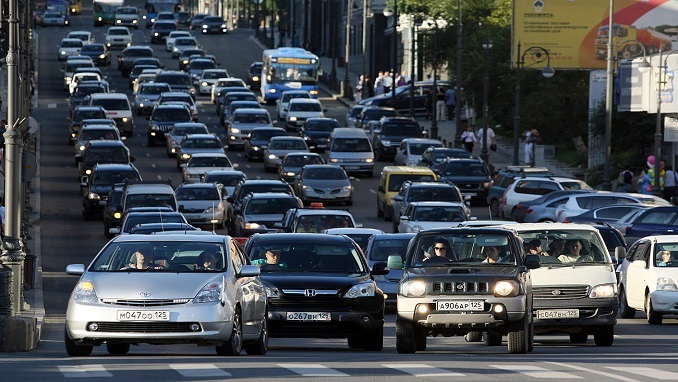

In [79]:
img = cv2.imread(file_name)

height, width, channels = img.shape

cv2_imshow(img)

In [80]:
blob = cv2.dnn.blobFromImage(
    img,
    scalefactor= 1/255.0,
    size=(416, 416),
    mean=(0, 0, 0), 
    swapRB=True, 
    crop=False,  
)

In [81]:
net.setInput(blob)
outs = net.forward(output_layers)

In [82]:
len(outs)

3

In [61]:
car_num_cascade = cv2.CascadeClassifier()

In [63]:
car_num_cascade.load(cv2.samples.findFile(car_cascade_name))

True

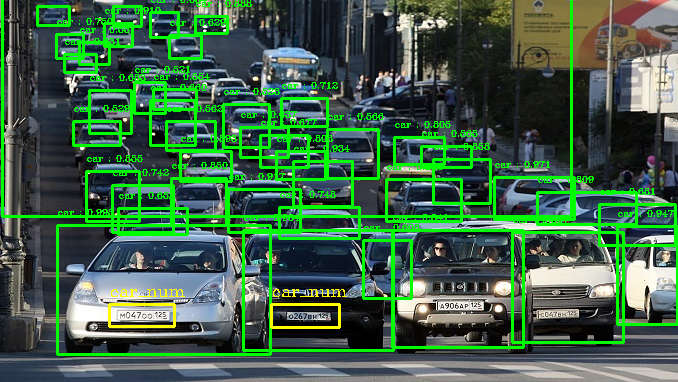

In [88]:
confidences = []
boxes = []

for out in outs:
  for detection in out:
    scores = detection[5: ]
    
    confidence = scores[2] 

    if confidence > min_confidence:
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)

      w = int(detection[2] * width)
      h = int(detection[3] * height)

      x = int(center_x - w / 2)
      y = int(center_y - h / 2)

      boxes.append([x, y, w, h])
      confidences.append(float(confidence))


indexes = cv2.dnn.NMSBoxes(boxes,
                           confidences,
                           min_confidence,
                           0.4) 

frame = img.copy()

for i in indexes:
  idx = i[0]
  x, y, w, h = boxes[idx]
   
  color = colors

  label = "{} : {:.3f}".format(str(classes[2]), confidences[idx])

  frame = cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2) 

  carsROI = gray[y: y+h, x: x+h]

  cars_num = car_num_cascade.detectMultiScale(carsROI)
  cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_COMPLEX, 0.3, color, 1)
  

  for (x2, y2, w2, h2) in cars_num:
      label = 'car_num'

      frame = cv2.rectangle(frame, (x + x2, y + y2), (x+x2+w2, y+y2+h2), (0, 255, 255), 2)
      cv2.putText(frame, label, (x + x2, y+y2 - 8), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 255), 1)

cv2_imshow(frame)

In [91]:
cv2.imwrite("car-copy2.jpg", frame)

True

In [93]:
from google.colab import files
files.download("car-copy2.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>